In [2]:
# Importing necessary libraries
import pickle
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import  roc_curve


# VARS

In [1]:
MODEL_PATH = f"./records/"
uuid_global = "model_v9_9e55efea"

## GLOBAL

In [4]:
with open(f"/home/lucas/dataset_chest/classificacao_multilabel_chest/fusion_model/home/matheus_levy/workspace/lucas/metrics/model_v4/metrics_global_v4", "rb") as f:
    h = pickle.load(f)

Text(0.5, 1.0, 'Train/Val Loss x Epochs - Global')

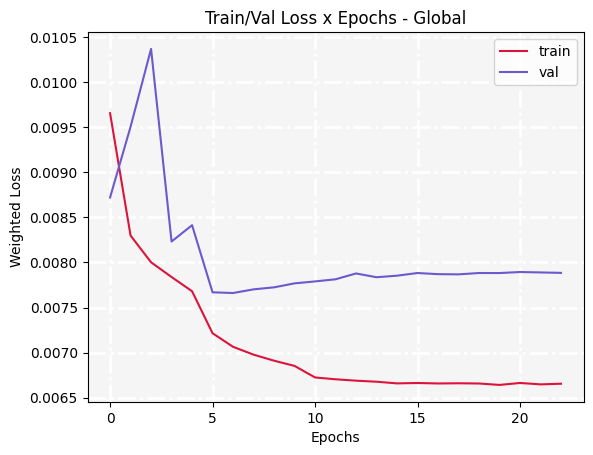

In [6]:
with open(f"/home/lucas/dataset_chest/classificacao_multilabel_chest/fusion_model/home/matheus_levy/workspace/lucas/metrics/model_v4/history_global", "rb") as f:
    h = pickle.load(f)
plt.xlabel("Epochs")
plt.ylabel("Weighted Loss")
plt.gca().set_facecolor("whitesmoke")
plt.grid(color='w', linewidth=2, linestyle='-.')
plt.plot(h['loss'], c='crimson')
plt.plot(h['val_loss'], c='slateblue')
plt.legend(['train', 'val'])
# plt.ylim(0.06, 0.12)  # Define o intervalo de 0,1 a 0,9 no eixo y

plt.title("Train/Val Loss x Epochs - Global")

# ROC

Auc-Macro = 0.8160681209158299
Auc-Micro = 0.8720292825479474
Auc-Weighted = 0.7885991741740161


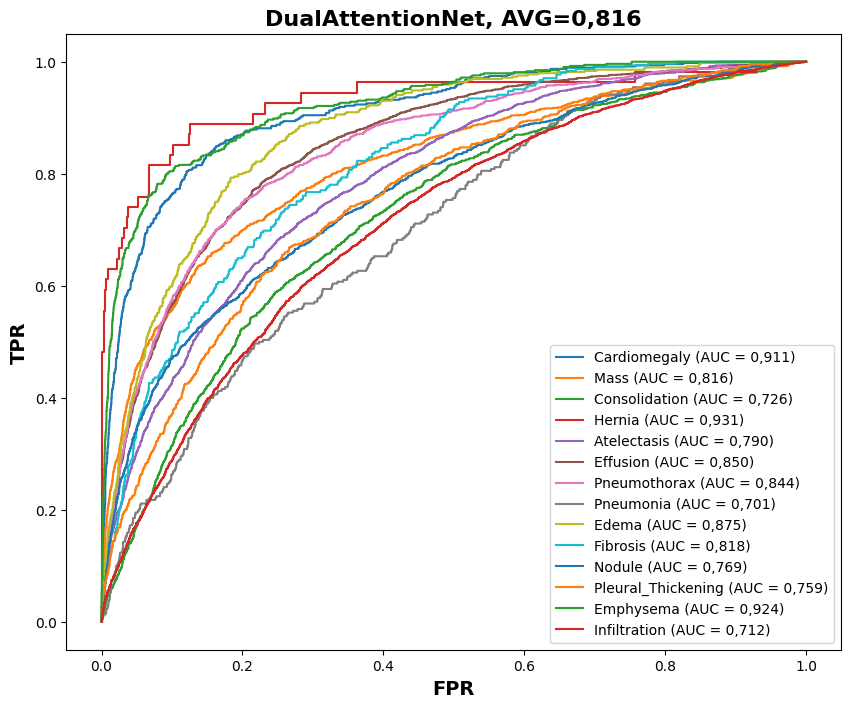

In [25]:
def plot_roc_curve(uuid ,metrics, title):
    with open(f"/home/lucas/dataset_chest/classificacao_multilabel_chest/fusion_model/home/matheus_levy/workspace/lucas/metrics/model_v4/metrics_global_v4", "rb") as f:
        var = pickle.load(f)
    # Calculando a curva AUC
    plt.figure(figsize=(10, 8))
    # Plotando as curvas ROC
    for i in range(len(var['labels'])):
        auc = "{:.3f}".format((var['auc_scores'][i]))
        auc_str = str(auc).replace(".", ",")
        fpr, tpr, _ = roc_curve(var['groun_truth'][:, i], var['predictions'][:, i])
        plt.plot(fpr, tpr, label=var['labels'][i] + ' (AUC = {})'.format(auc_str))
    print(f"Auc-Macro = {var['auc_macro']}")
    print(f"Auc-Micro = {var['auc_micro']}")
    print(f"Auc-Weighted = {var['auc_weighted']}")
    # Adicionando legendas e título ao gráfico
    plt.xlabel('FPR', fontsize=14, weight='bold')
    plt.ylabel('TPR', fontsize=14, weight='bold')
    plt.title(f'DualAttentionNet, AVG=0,816', fontsize=16, weight='bold')
    plt.legend()

    # Exibindo o gráfico
    plt.show()
plot_roc_curve(uuid_global,"metrics_fusion", "Global")

In [9]:
uuid_global =""

Auc-Macro = 0.8160681209158299
Auc-Micro = 0.8720292825479474
Auc-Weighted = 0.7885991741740161


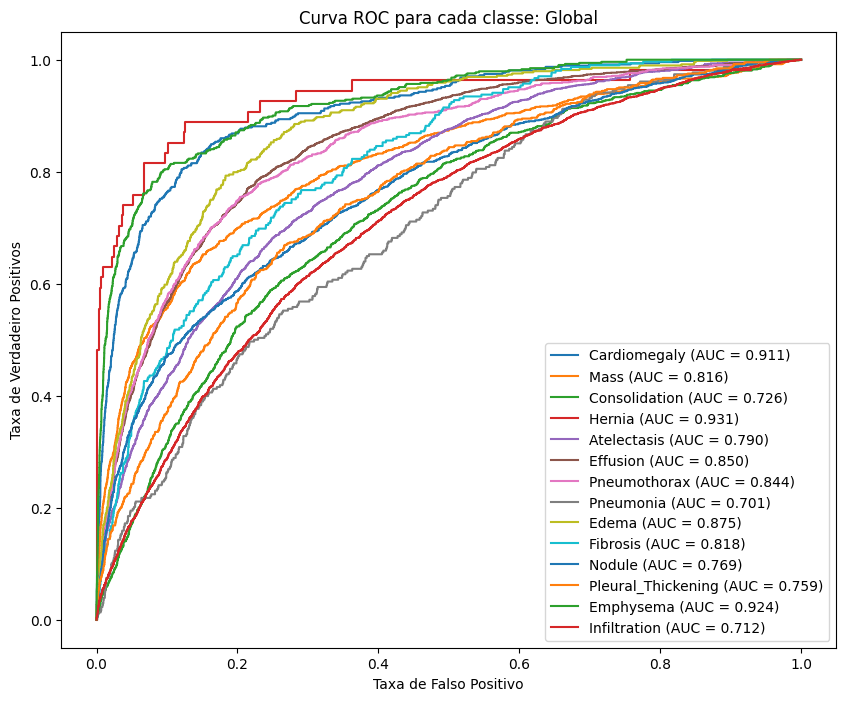

# Train/Val Metrics - Paralelo

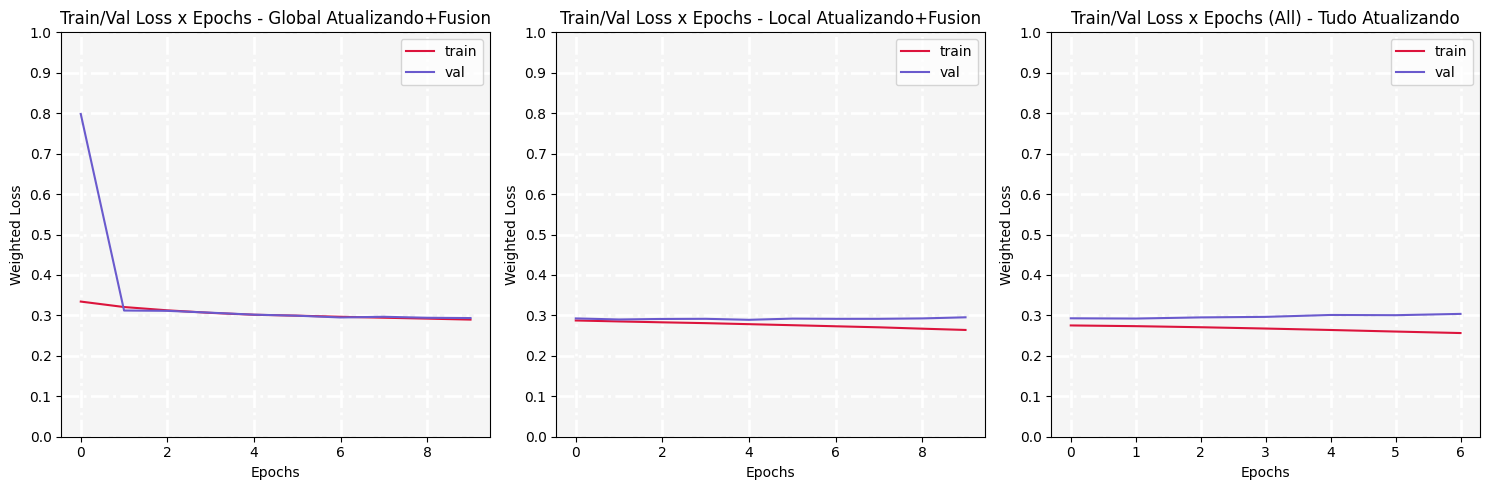

In [19]:
# Loading the first history data
with open(f"{MODEL_PATH}/history_all", "rb") as f:
    h_all = pickle.load(f)

# Loading the other two history data (replace "history_1" and "history_2" with the actual filenames)
with open(f"{MODEL_PATH}/history_global", "rb") as f:
    h_1 = pickle.load(f)

with open(f"{MODEL_PATH}/history_local", "rb") as f:
    h_2 = pickle.load(f)

# Creating subplots for side-by-side comparison
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed


# Second subplot
plt.subplot(1, 3, 1)
plt.xlabel("Epochs")
plt.ylabel("Weighted Loss")
plt.gca().set_facecolor("whitesmoke")
plt.grid(color='w', linewidth=2, linestyle='-.')
plt.plot(h_1['loss'], c='crimson')
plt.plot(h_1['val_loss'], c='slateblue')
plt.legend(['train', 'val'])
plt.gca().set_ylim(0, 1)
plt.gca().set_yticks([i/10 for i in range(11)])
plt.title("Train/Val Loss x Epochs - Global Atualizando+Fusion")

# Third subplot
plt.subplot(1, 3, 2)
plt.xlabel("Epochs")
plt.ylabel("Weighted Loss")
plt.gca().set_facecolor("whitesmoke")
plt.grid(color='w', linewidth=2, linestyle='-.')
plt.plot(h_2['loss'], c='crimson')
plt.plot(h_2['val_loss'], c='slateblue')
plt.legend(['train', 'val'])
plt.gca().set_ylim(0, 1)
plt.gca().set_yticks([i/10 for i in range(11)])
plt.title("Train/Val Loss x Epochs - Local Atualizando+Fusion")

# First subplot
plt.subplot(1, 3, 3)
plt.xlabel("Epochs")
plt.ylabel("Weighted Loss")
plt.gca().set_facecolor("whitesmoke")
plt.grid(color='w', linewidth=2, linestyle='-.')
plt.plot(h_all['loss'], c='crimson')
plt.plot(h_all['val_loss'], c='slateblue')
plt.legend(['train', 'val'])
plt.gca().set_ylim(0, 1)
plt.gca().set_yticks([i/10 for i in range(11)])
plt.title("Train/Val Loss x Epochs (All) - Tudo Atualizando")

plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()
